In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
def fix_seed(seed):
    '''
    Args : 
        seed : fix the seed
    Function which allows to fix all the seed and get reproducible results
    '''
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.use_deterministic_algorithms(True)
    os.environ['OMP_NUM_THREADS'] = '1'
    os.environ['MKL_NUM_THREADS'] = '1'
    torch.set_num_threads(1)

fix_seed(42)
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

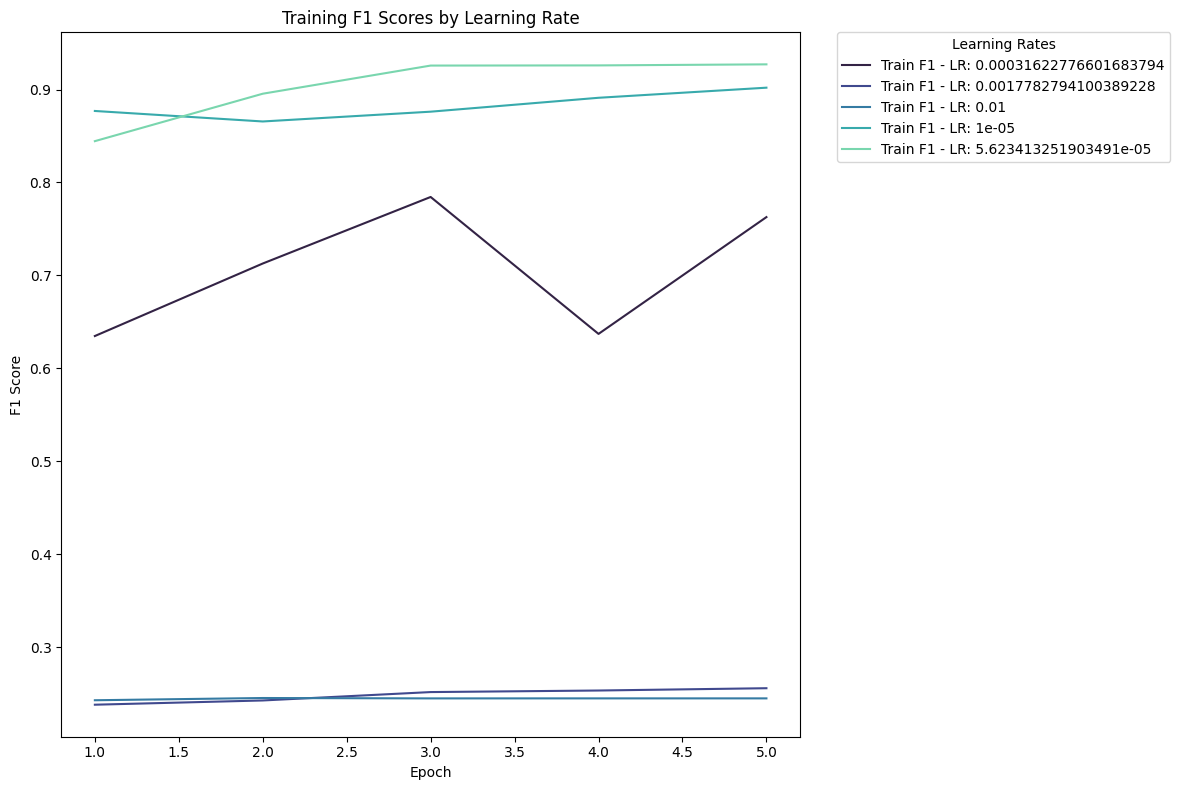

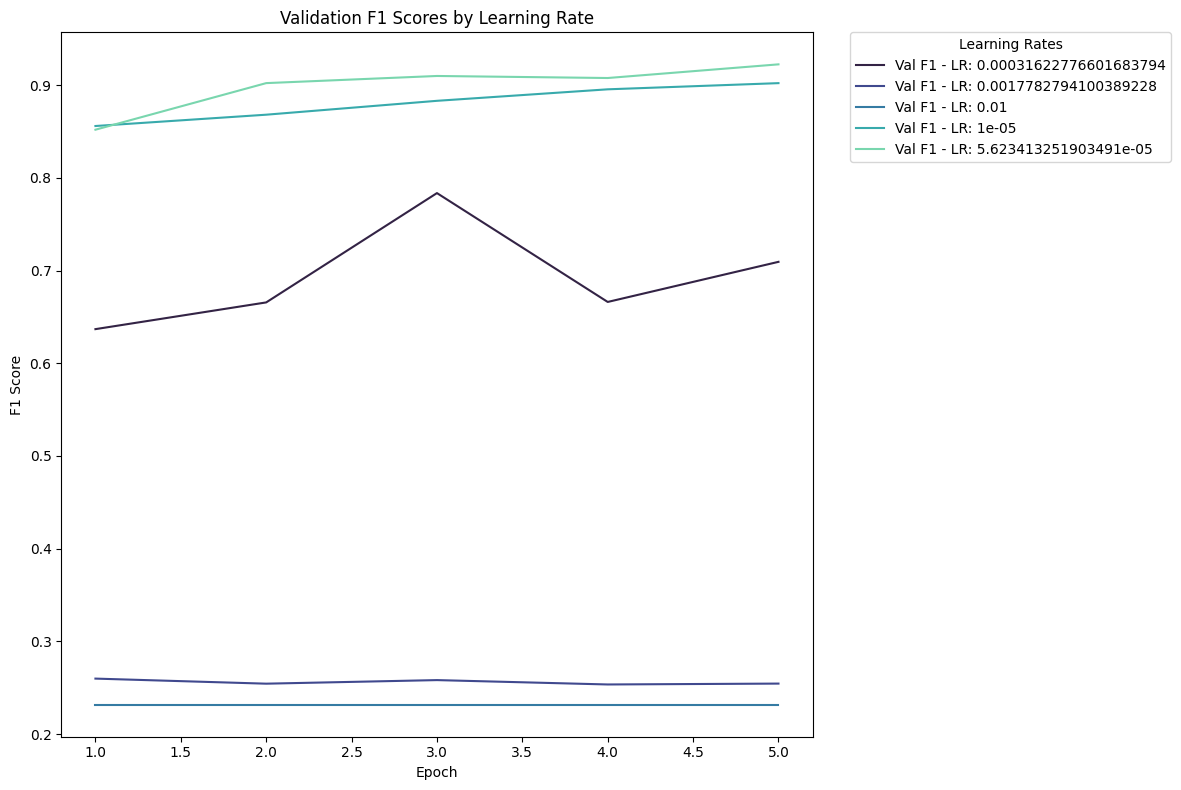

In [25]:
# Step 1: Load the data and extract learning rate from filenames
file_paths = glob("checkpoints/CBAMResNet50_finetuned_w_hierarchical_hyperparameter_search_lr*_metrics.csv")
# Create an empty DataFrame to hold all the data
all_data = pd.DataFrame()

# Loop through each file, read the data, and append to the all_data DataFrame
for file_path in file_paths:
    # Extract learning rate from the file path for labeling purposes
    lr = file_path.split('_lr_')[-1].split('_metrics')[0]
    # Read the CSV file
    temp_df = pd.read_csv(file_path)
    # Add a column for the learning rate
    temp_df['learning_rate'] = lr
    temp_df['epoch'] = range(1, len(df) + 1)  # Manually add epoch numbers starting from 1
    # Append to the main DataFrame
    all_data = pd.concat([all_data, temp_df], ignore_index=True)

# Set a darker color palette
palette = sns.color_palette("mako", n_colors=len(file_paths))

# Plotting Training F1 Scores
plt.figure(figsize=(12, 8))
for i, lr in enumerate(all_data['learning_rate'].unique()):
    subset = all_data[all_data['learning_rate'] == lr]
    sns.lineplot(x='epoch', y='train_f1', data=subset, label=f'Train F1 - LR: {lr}', color=palette[i])
plt.title('Training F1 Scores by Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend(title='Learning Rates', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.savefig('training_f1_scores.png')
plt.show()

# Plotting Validation F1 Scores
plt.figure(figsize=(12, 8))
for i, lr in enumerate(all_data['learning_rate'].unique()):
    subset = all_data[all_data['learning_rate'] == lr]
    sns.lineplot(x='epoch', y='val_f1', data=subset, label=f'Val F1 - LR: {lr}', color=palette[i])
plt.title('Validation F1 Scores by Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend(title='Learning Rates', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.savefig('validation_f1_scores.png')
plt.show()